In [1]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocessing and modelling
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from dmba import plotDecisionTree, classificationSummary, regressionSummary


# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [2]:
# Data Loading
# CRIM: per capita crime rate by town
# ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS: proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: nitric oxides concentration (parts per 10 million)
# RM: average number of rooms per dwelling
# AGE: proportion of owner-occupied units built prior to 1940
# DIS: weighted distances to five Boston employment centres
# RAD: index of accessibility to radial highways
# TAX: full-value property-tax rate per $10,000
# PTRATIO: pupil-teacher ratio by town
# B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT: % lower status of the population
# MEDV: Median value of owner-occupied homes in $1000's

#training data
data_train = pd.read_excel("housing.xlsx", sheet_name='Hoja1')
data_train.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2310.0,0,0.538,65750,65.2,40900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7070.0,0,0.469,64210,78.9,49671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7070.0,0,0.469,71850,61.1,49671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2180.0,0,0.458,69980,45.8,60622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2180.0,0,0.458,71470,54.2,60622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    int64  
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    int64  
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [4]:
# Configuring train and test datasets
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        data_train.drop(columns = "MEDV"),
                                        data_train['MEDV'],
                                        random_state = 123
                                    )


In [5]:
# Creating the model with decision tree
# ------------------------------------------------------------------------------
model1 = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 123
          )
# Entrenamiento del modelo
# ------------------------------------------------------------------------------
model1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

Tree Depth: 3
Number of leaves or terminal nodes: 8


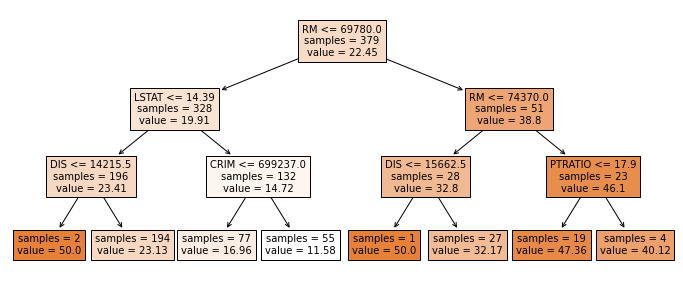

In [6]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Tree Depth: {model1.get_depth()}")
print(f"Number of leaves or terminal nodes: {model1.get_n_leaves()}")



plot = plot_tree(
            decision_tree = model1,
            feature_names = data_train.drop(columns = "MEDV").columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [7]:
# get the text representation

#text_representation = tree.export_text(model)  # generic features

text_representation = tree.export_text(model1, feature_names= list(data_train.drop(columns = "MEDV").columns) )



print(text_representation)

|--- RM <= 69780.00
|   |--- LSTAT <= 14.39
|   |   |--- DIS <= 14215.50
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  14215.50
|   |   |   |--- value: [23.13]
|   |--- LSTAT >  14.39
|   |   |--- CRIM <= 699237.00
|   |   |   |--- value: [16.96]
|   |   |--- CRIM >  699237.00
|   |   |   |--- value: [11.58]
|--- RM >  69780.00
|   |--- RM <= 74370.00
|   |   |--- DIS <= 15662.50
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  15662.50
|   |   |   |--- value: [32.17]
|   |--- RM >  74370.00
|   |   |--- PTRATIO <= 17.90
|   |   |   |--- value: [47.36]
|   |   |--- PTRATIO >  17.90
|   |   |   |--- value: [40.12]



In [8]:
# Model training error
#-------------------------------------------------------------------------------
prediction_train = model1.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training:', round(metrics.r2_score(y_train, prediction_train),2))

#Measuring accuracy on Testing Data
print('Accuracy in training',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train


R2 Value in training: 0.82
Accuracy in training 84.08


In [9]:
# Model test error
#-------------------------------------------------------------------------------
prediction_test = model1.predict(X = X_test)


#Measuring accuracy on Testing Data
print('Accuracy in test',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))
      
 
residuals_testn=y_test - prediction_test

Accuracy in test 81.05


In [10]:
print("Importance of predictors ")
print("-------------------------------------------")
importance_predictors = pd.DataFrame(
                            {'predictor': list(data_train.drop(columns = "MEDV").columns),
                             'importance': model1.feature_importances_}
                            )
importance_predictors.sort_values('importance', ascending=False)


Importance of predictors 
-------------------------------------------


,predictor,importance
5,RM,0.671680
12,LSTAT,0.222326
7,DIS,0.064816
0,CRIM,0.034714
10,PTRATIO,0.006465
1,ZN,0.000000
2,INDUS,0.000000
3,CHAS,0.000000
4,NOX,0.000000
6,AGE,0.000000


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

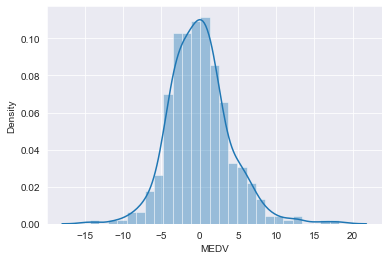

In [11]:
# Error in training
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(y_train-prediction_train)

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

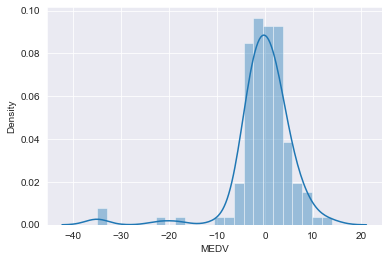

In [13]:
# Error in test

sns.set_style('darkgrid')
sns.distplot(y_test-prediction_test)

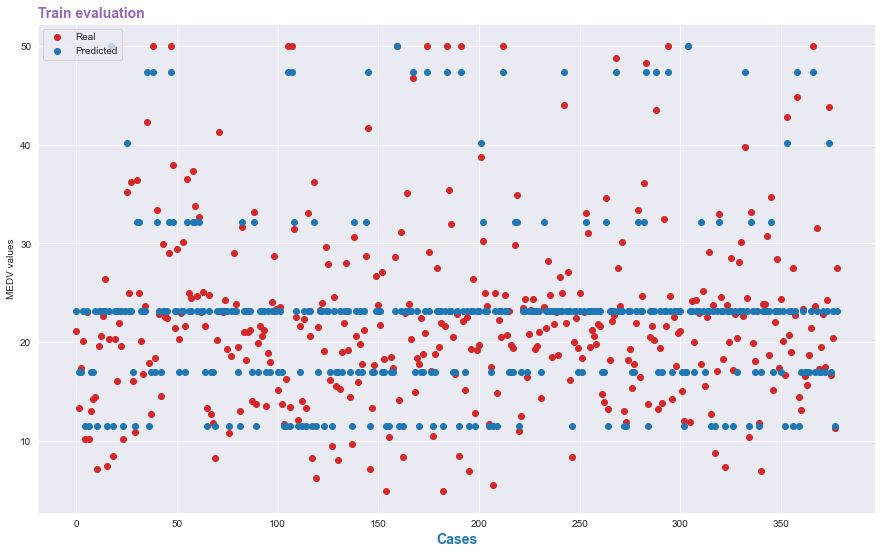

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_train)))

ax.scatter(x_axis, y_train, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Train evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

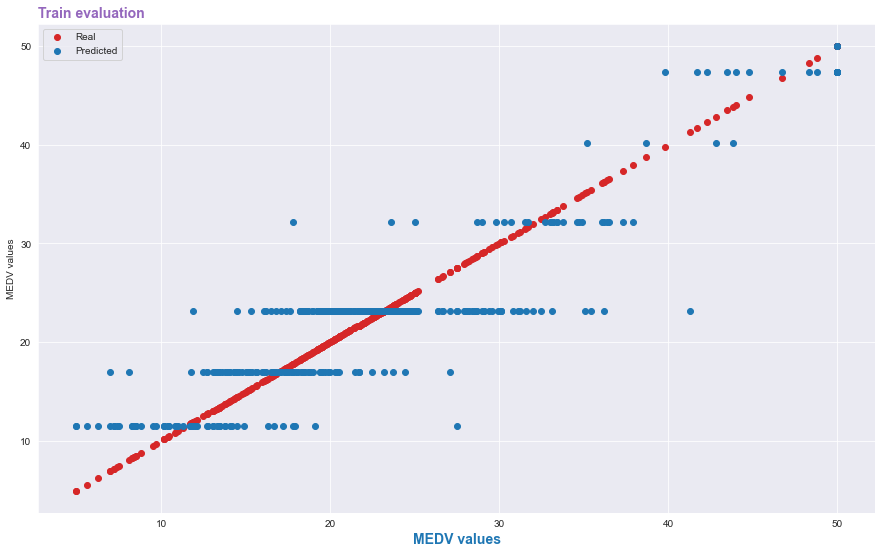

In [15]:
import matplotlib.pyplot as plt  # TRAINING

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_train, y_train, color = 'tab:red', label='Real')
ax.scatter(y_train, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("MEDV values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Train evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

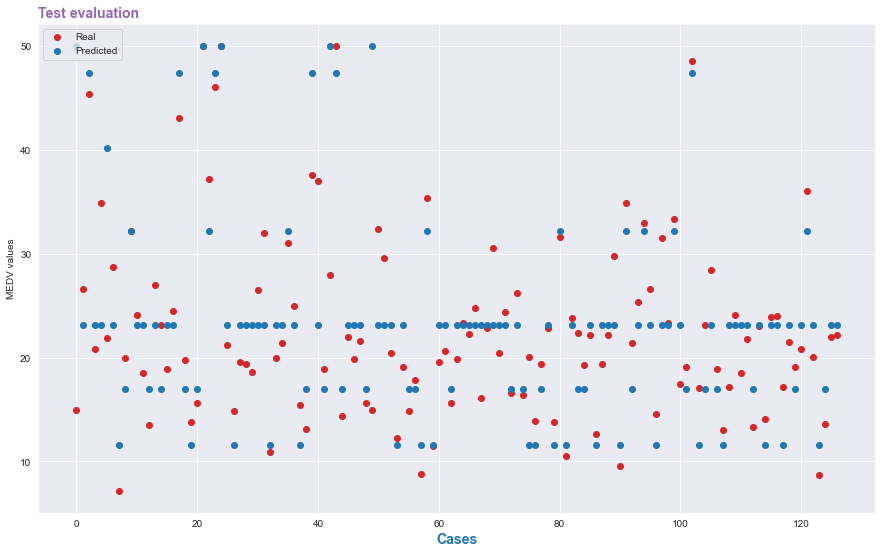

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_test)))

ax.scatter(x_axis, y_test, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Test evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

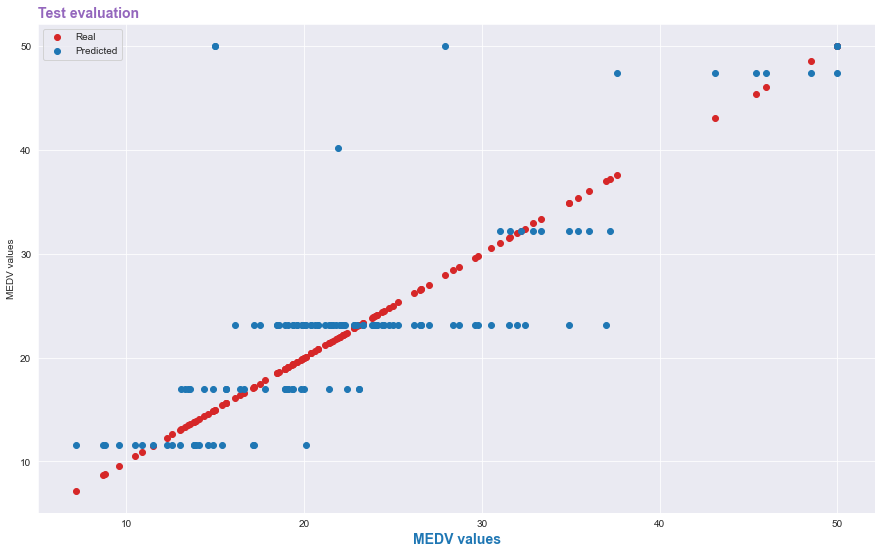

In [17]:
#######  TEST

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_test, y_test, color = 'tab:red', label='Real')
ax.scatter(y_test, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("MEDV values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Test evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

In [18]:
# Analyzing Pruning
#-------------------------


#SEVERAL METHODS ARE PROPOSED BELOW



In [19]:
# Common-sense selection of alpha based on cost-complexity values

#Obtaining diferent options of alpha values

path = model1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

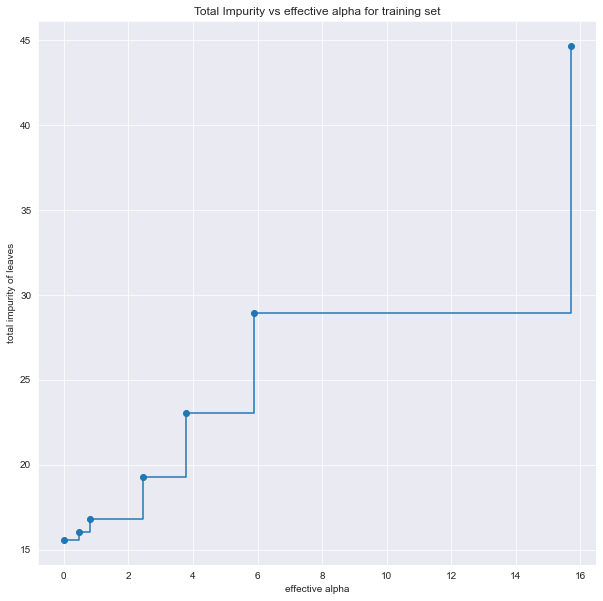

In [20]:
# Representation Impurity vs effective alpha for training set

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [21]:
# Different alpha options are tried
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 41.56529665282801


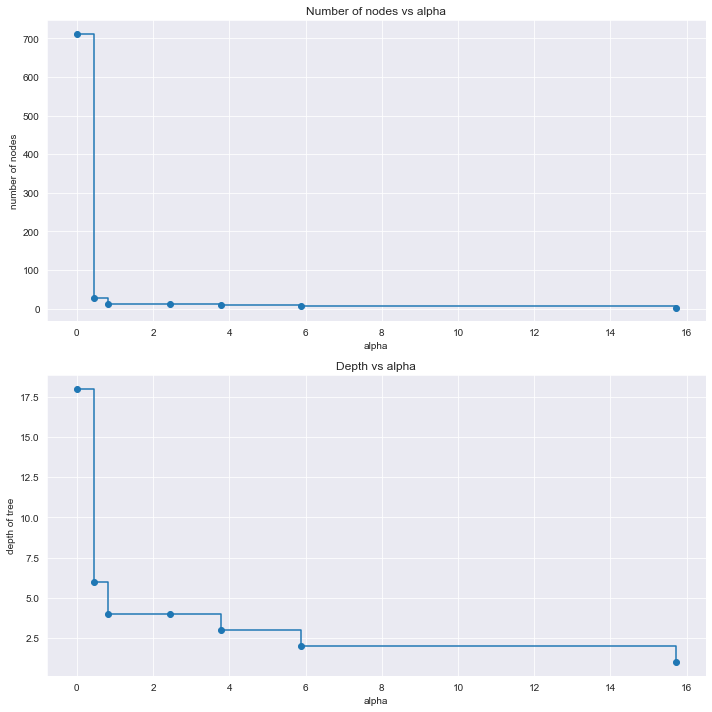

In [22]:
# we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node
# This is not classification

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots( 2, 1, figsize=(10,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

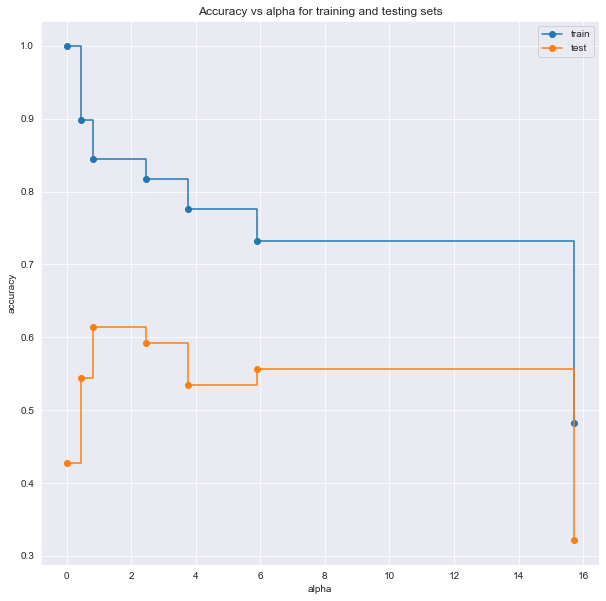

In [23]:
# Cheking scores in training and test datasets for different alphas

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [24]:
# the scores obtained are now printed and ordered by the best test score

eva_df = pd.DataFrame({'ccp_alphas': ccp_alphas, 'train_scores': train_scores, 'test_scores': test_scores})
eva_df = eva_df.sort_values(['test_scores'], ascending = False)
eva_df.head(10)

,ccp_alphas,train_scores,test_scores
2,0.809155,0.845435,0.613706
3,2.452822,0.816989,0.591828
5,5.894276,0.732569,0.556479
1,0.456775,0.898321,0.543855
4,3.770583,0.776297,0.535187
0,0.000000,1.000000,0.428248
6,15.709076,0.482034,0.321760


In [25]:
# Obtaining the best alpha from the previous list
best_alpha= eva_df.iloc[0][0]

best_alpha


0.8091547304938294

In [26]:
# fit the pruned tree with best alpha
import pydotplus
from dmba import plotDecisionTree, classificationSummary, regressionSummary

prunedtree_I = DecisionTreeRegressor(ccp_alpha=best_alpha, random_state=0)

prunedtree_I.fit(X_train, y_train)


#classificationSummary(y_train, prunedtree_I.predict(X_train_prep))
#classificationSummary(y_test, prunedtree_I.predict(X_test_prep))

DecisionTreeRegressor(ccp_alpha=0.8091547304938294, random_state=0)

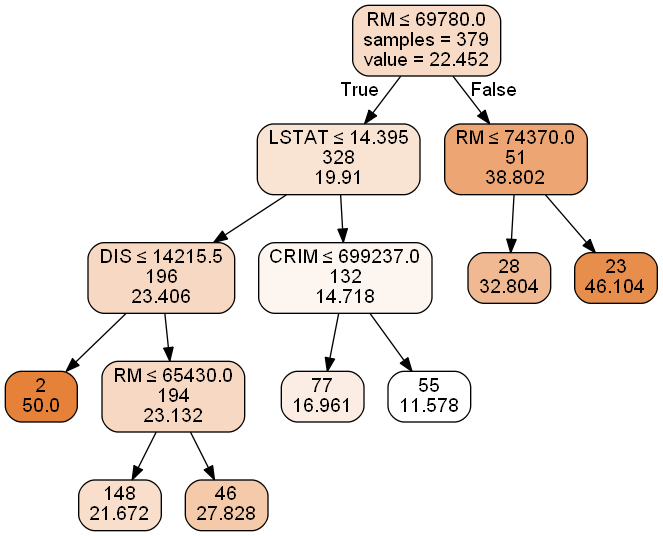

In [27]:

plotDecisionTree(prunedtree_I, feature_names=list(data_train.drop(columns = "MEDV").columns))

In [28]:
# Model training error
#-------------------------------------------------------------------------------
prediction_train = prunedtree_I.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training:', round(metrics.r2_score(y_train, prediction_train),2))

#Measuring accuracy on Testing Data
print('Accuracy in training',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train


R2 Value in training: 0.85
Accuracy in training 85.19


In [29]:
# Model test error
#-------------------------------------------------------------------------------
prediction_test = prunedtree_I.predict(X = X_test)


#Measuring accuracy on Testing Data
print('Accuracy in test',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))
      
 
residuals_testn=y_test - prediction_test

Accuracy in test 83.55


In [30]:
#  II.  Alternative method using GridSearchCV to fine tune method parameters
#----------------------------------------------------------------------

In [39]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth':[5,10,20,],
    'min_samples_split':[20,40,60,80],
    'min_impurity_decrease': [0.0001, 0.0005, 0.001, 0.005, 0.01]
}

gridSearch = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=10, n_jobs=1)
gridSearch.fit(X_train, y_train)

print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.7773041393741911
Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 40}


In [42]:
# Adapt grid based on result from initial grid search
param_grid = {
 'max_depth': list(range(5,7)), 
 'min_samples_split': list(range(40, 45)), 
 'min_impurity_decrease': [x/10000 for x in range(1, 900, 100)], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=10, n_jobs=-1)
gridSearch.fit(X_train, y_train)

print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_

Improved score:  0.7842842450393698
Improved parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 41}


In [43]:
# fit the final model with best parameters: {'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 41}

# prunedtree = gridSearch.best_estimator_
# or:
prunedtree_II = DecisionTreeRegressor(random_state = 1, max_depth=5, min_impurity_decrease=0.0001, min_samples_split=41)
prunedtree_II.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.0001,
                      min_samples_split=41, random_state=1)

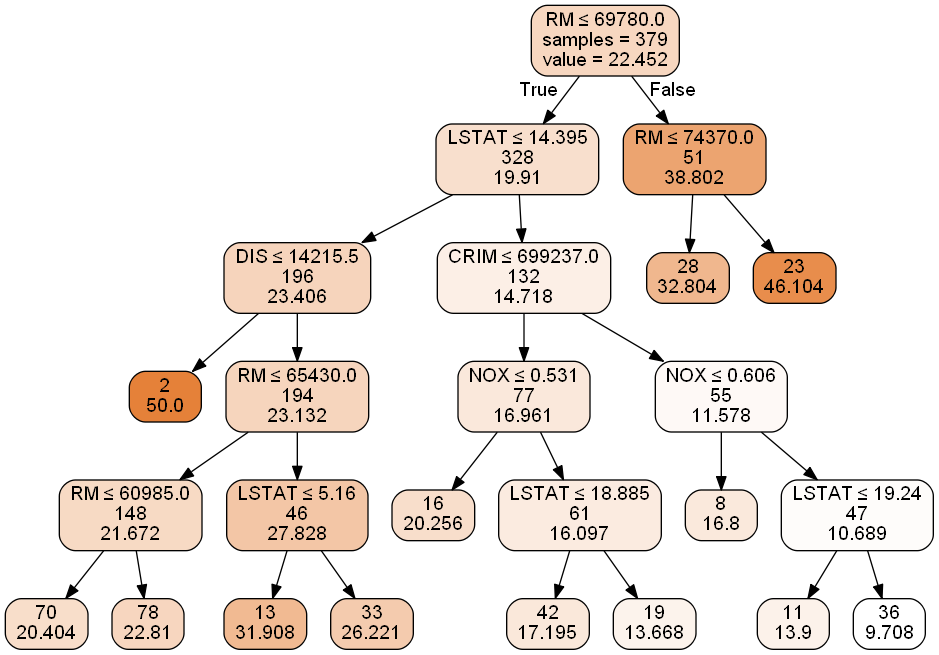

In [44]:
plotDecisionTree(prunedtree_II, feature_names=list(data_train.drop(columns = "MEDV").columns))

In [45]:
# Model training error
#-------------------------------------------------------------------------------
prediction_train = prunedtree_II.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training:', round(metrics.r2_score(y_train, prediction_train),2))

#Measuring accuracy on Testing Data
print('Accuracy in training',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train

# Model test error
#-------------------------------------------------------------------------------
prediction_test = prunedtree_II.predict(X = X_test)


#Measuring accuracy on Testing Data
print('Accuracy in test',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))
      
 
residuals_testn=y_test - prediction_test

R2 Value in training: 0.89
Accuracy in training 88.03
Accuracy in test 84.95


In [46]:
# Final pruned tree
# ------------------------------------------------------------------------------
#model_final = grid.best_estimator_
print(f" Tree Depth: {prunedtree_II.get_depth()}")
print(f"Number of terminal nodes: {prunedtree_II.get_n_leaves()}")

 Tree Depth: 5
Number of terminal nodes: 13


In [ ]:
# METHOD:  prune the tree with cost complexity pruning - Cross Validation

In [47]:
from sklearn.model_selection import cross_val_score

# fit the tree
fulltree = DecisionTreeRegressor(random_state=2)
fulltree.fit(X_train, y_train)


path = fulltree.cost_complexity_pruning_path(X_train, y_train)
alphas, impurities = path.ccp_alphas, path.impurities

mean, std = [], []
for i in alphas:
    tree = DecisionTreeRegressor(ccp_alpha=i, random_state=0)
#     cross validation for each alpha value
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    mean.append(scores.mean())
    std.append(scores.std())
# keep a record of the values of alpha, mean, standard deviation
eva_df = pd.DataFrame({'alpha': alphas, 'mean': mean, 'std': std})
eva_df = eva_df.sort_values(['mean'], ascending = False)
eva_df.head(10)

,alpha,mean,std
338,2.452822,0.760954,0.131305
320,0.185820,0.721232,0.173994
321,0.205449,0.720687,0.173781
318,0.156517,0.718888,0.171846
322,0.220787,0.718675,0.174696
323,0.221484,0.718675,0.174696
314,0.128190,0.718058,0.153262
313,0.126147,0.718043,0.153287
312,0.124547,0.718043,0.153287
319,0.172272,0.717691,0.171970


In [48]:
# fit the pruned tree - cv
prunedtree_cv = DecisionTreeRegressor(ccp_alpha=eva_df.iloc[338, 0], random_state=0)
prunedtree_cv.fit(X_train, y_train)



DecisionTreeRegressor(ccp_alpha=0.0009894459102903874, random_state=0)

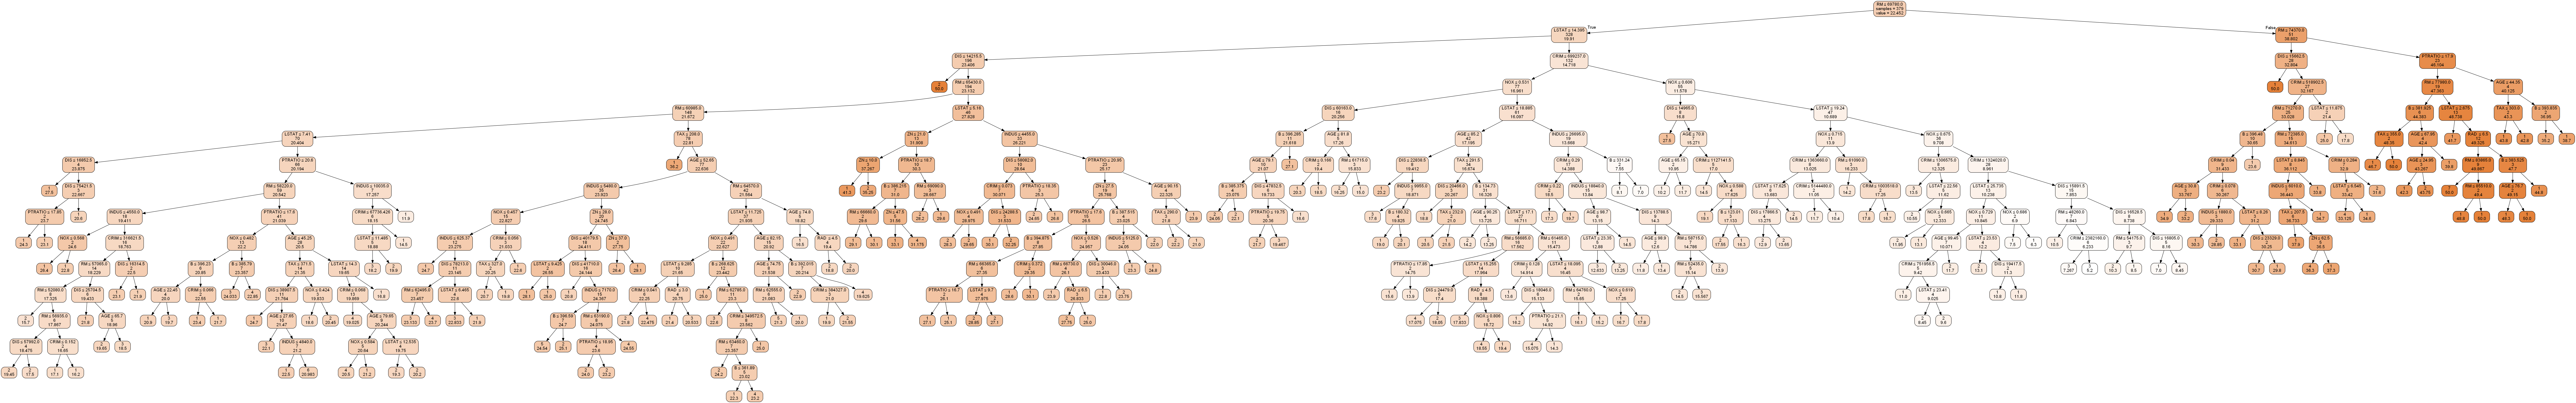

In [49]:
plotDecisionTree(prunedtree_cv, feature_names=list(data_train.drop(columns = "MEDV").columns))

In [50]:
# Model training error
#-------------------------------------------------------------------------------
prediction_train = prunedtree_cv.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training:', round(metrics.r2_score(y_train, prediction_train),2))

#Measuring accuracy on Testing Data
print('Accuracy in training',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train

# Model test error
#-------------------------------------------------------------------------------
prediction_test = prunedtree_cv.predict(X = X_test)


#Measuring accuracy on Testing Data
print('Accuracy in test',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))
      
 
residuals_testn=y_test - prediction_test

R2 Value in training: 1.0
Accuracy in training 99.35
Accuracy in test 80.39


In [51]:
# Final selection  pruned_tree_II

tree_final = DecisionTreeRegressor(random_state = 1, max_depth=5, min_impurity_decrease=0.0001, min_samples_split=41)
tree_final.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.0001,
                      min_samples_split=41, random_state=1)

In [52]:
print("Importance of predictors ")
print("-------------------------------------------")
importance_predictors = pd.DataFrame(
                            {'predictor': list(data_train.drop(columns = "MEDV").columns),
                             'importance': tree_final.feature_importances_}
                            )
importance_predictors.sort_values('importance', ascending=False)

Importance of predictors 
-------------------------------------------


,predictor,importance
5,RM,0.675101
12,LSTAT,0.226965
7,DIS,0.049397
0,CRIM,0.032134
4,NOX,0.016404
1,ZN,0.000000
2,INDUS,0.000000
3,CHAS,0.000000
6,AGE,0.000000
8,RAD,0.000000
